In [1]:
# data storage and handling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import string 

from datetime import datetime


# ignore warnings  
import warnings
warnings.filterwarnings('ignore')

/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_17917/199779709.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
respath = '/Users/Serena/Desktop/cardiacMRI/Results/results.xlsx'

res = pd.ExcelFile(respath)

# Now you can list all sheets in the file
models = res.sheet_names

# df = df.set_index('term') 
# df['outcome'] = df['model'].str.split(" - ", expand = True)[1]

In [3]:
models

['LV_mass_bsaz_M0',
 'LV_mass_bsaz_M1',
 'LV_end_diastolic_volume_bsaz_M0',
 'LV_end_diastolic_volume_bsaz_M1',
 'RV_end_diastolic_volume_bsaz_M0',
 'RV_end_diastolic_volume_bsaz_M1',
 'LV_ejection_fraction_bsaz_M0',
 'LV_ejection_fraction_bsaz_M1',
 'RV_ejection_fraction_bsaz_M0',
 'RV_ejection_fraction_bsaz_M1',
 'LV_mass_10y_M0',
 'LV_mass_10y_M1',
 'LV_end_diastolic_volume_10y_M0',
 'LV_end_diastolic_volume_10y_M1',
 'RV_end_diastolic_volume_10y_M0',
 'RV_end_diastolic_volume_10y_M1',
 'LV_ejection_fraction_10y_M0',
 'LV_ejection_fraction_10y_M1',
 'RV_ejection_fraction_10y_M0',
 'RV_ejection_fraction_10y_M1']

In [4]:
def show_results(model, with_intercept=False):
    df = pd.read_excel(res, sheet_name=model)

    d = pd.concat([
    df.loc[df.term=='prenatal_stress_z'],
    df.loc[df.term=='postnatal_stress_z']
    ]).reset_index(drop=True)

    if with_intercept:
        d = pd.concat([df.loc[(df.model.str.contains('prenatal_stress|postnatal_stress')) & (df.term=='(Intercept)')], d]).reset_index(drop=True)
    
    return d
    

In [5]:
d = show_results('LV_end_diastolic_volume_bsaz_M0')
d

,model,term,m,estimate,std.error,statistic,df,p.value,lci,uci,riv,lambda,fmi,ubar,b,t,dfcom,rsq,rsq_adj
0,prenatal_stress_z - LV_end_diastolic_volume_bsaz,prenatal_stress_z,20.0,-0.045,0.022,-2.052,76.541,0.044,-0.088,-0.001,0.958,0.489,0.502,0.0,0.0,0.000,4214.0,0.123,0.121
1,prenatal_stress_z + postnatal_stress_z - LV_en...,prenatal_stress_z,20.0,-0.020,0.026,-0.776,66.834,0.441,-0.072,0.032,1.102,0.524,0.538,0.0,0.0,0.001,4213.0,0.125,0.122
2,postnatal_stress_z - LV_end_diastolic_volume_bsaz,postnatal_stress_z,20.0,-0.057,0.018,-3.254,221.051,0.001,-0.092,-0.023,0.393,0.282,0.289,0.0,0.0,0.000,4214.0,0.124,0.122
3,prenatal_stress_z + postnatal_stress_z - LV_en...,postnatal_stress_z,20.0,-0.048,0.021,-2.234,142.741,0.027,-0.090,-0.005,0.551,0.355,0.364,0.0,0.0,0.000,4213.0,0.125,0.122


In [6]:
# general plotting parameters 
plt.rcParams["font.family"] = "sans-serif"

In [14]:
def p(outc, ax, xlims=[-0.11,0.11], adj = 'M0'):
    lbls = ['prenatal ELS', 'postnatal ELS']

    md = show_results(f'{outc}_{adj}')
    md1 = md.iloc[[0,2]].reset_index(drop=True) # ADAPT
    md2 = md.iloc[[1,3]].reset_index(drop=True)

    styles = dict(marker='s', ms=11, elinewidth=2.5, capsize=9, alpha=.6)
    
    for n in range(len(md1)): # md.index for y
            ax.errorbar([md1['estimate'][n]], [lbls[n]], xerr = [md1['std.error'][n]*1.96], color = 'royalblue', **styles)
            ax.errorbar([md2['estimate'][n]], [lbls[n]], xerr = [md2['std.error'][n]*1.96], color = 'k', **styles)

    ax.set_xlim(xlims)
    ax.set_ylim(-0.2,1.2)
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=16)
    # Add x-label
    ax.set_xlabel(r'Standardized $\beta $ estimate', fontsize=18, labelpad=10)
    # add a vertical dotted line indicating beta = 0 or OR = 1.
    ax.axvline(x = 0, ymin = -1, ymax = 10, color = 'grey', ls = '--', lw = 1)

    sign = md2.reset_index().index[md2['p.value']<0.05].to_list()
    for pos in sign:
        ax.get_yticklabels()[pos].set_weight("bold") 

    # add a title 
    ax.set_title(outc, fontweight = 'bold', fontsize = 22, pad =10)


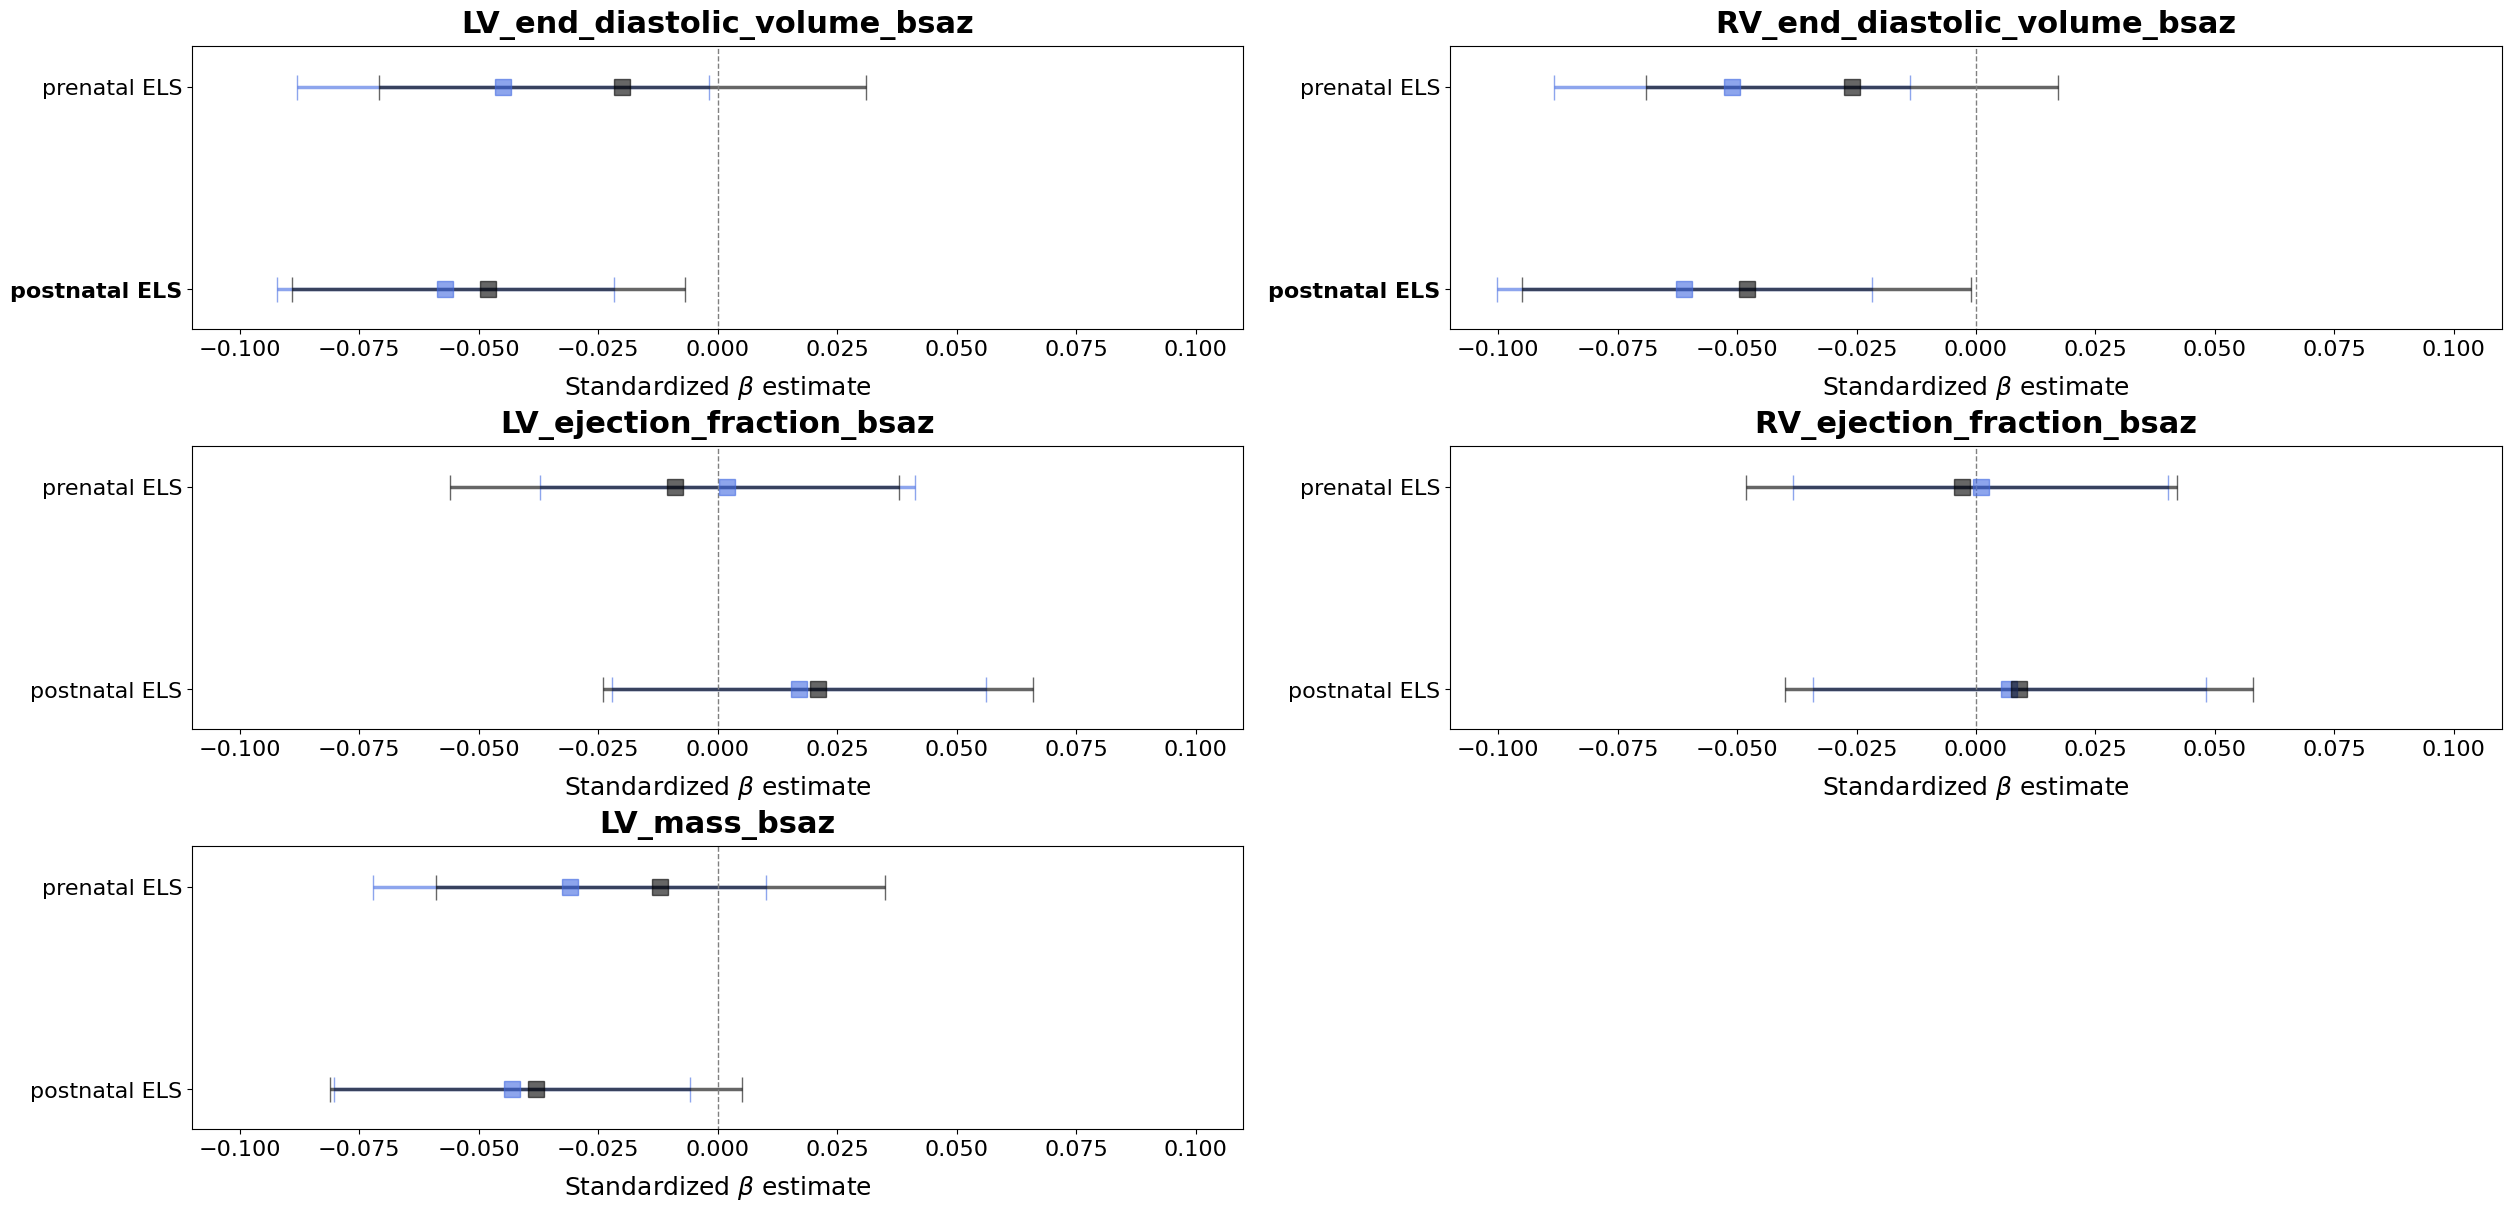

In [15]:
# f, axs = plt.subplots(3, 2, figsize=(25, 12), constrained_layout = True)

f, axs = plt.subplot_mosaic('AB;CD;E.', figsize=(25, 12), constrained_layout = True)

p('LV_end_diastolic_volume_bsaz', axs['A'])
p('RV_end_diastolic_volume_bsaz', axs['B'])

p('LV_ejection_fraction_bsaz',  axs['C'])
p('RV_ejection_fraction_bsaz',  axs['D'])

p('LV_mass_bsaz', axs['E'])

# axs[2,1].axis('off')

f.subplots_adjust(hspace=3, wspace=0.4)

# f.savefig('/Users/Serena/Desktop/cardiacMRI/res.png', bbox_inches="tight", dpi=400)

## NON-LINEAR

In [55]:
cm = 15
f2 = 20
f1 = 28
ms = 15

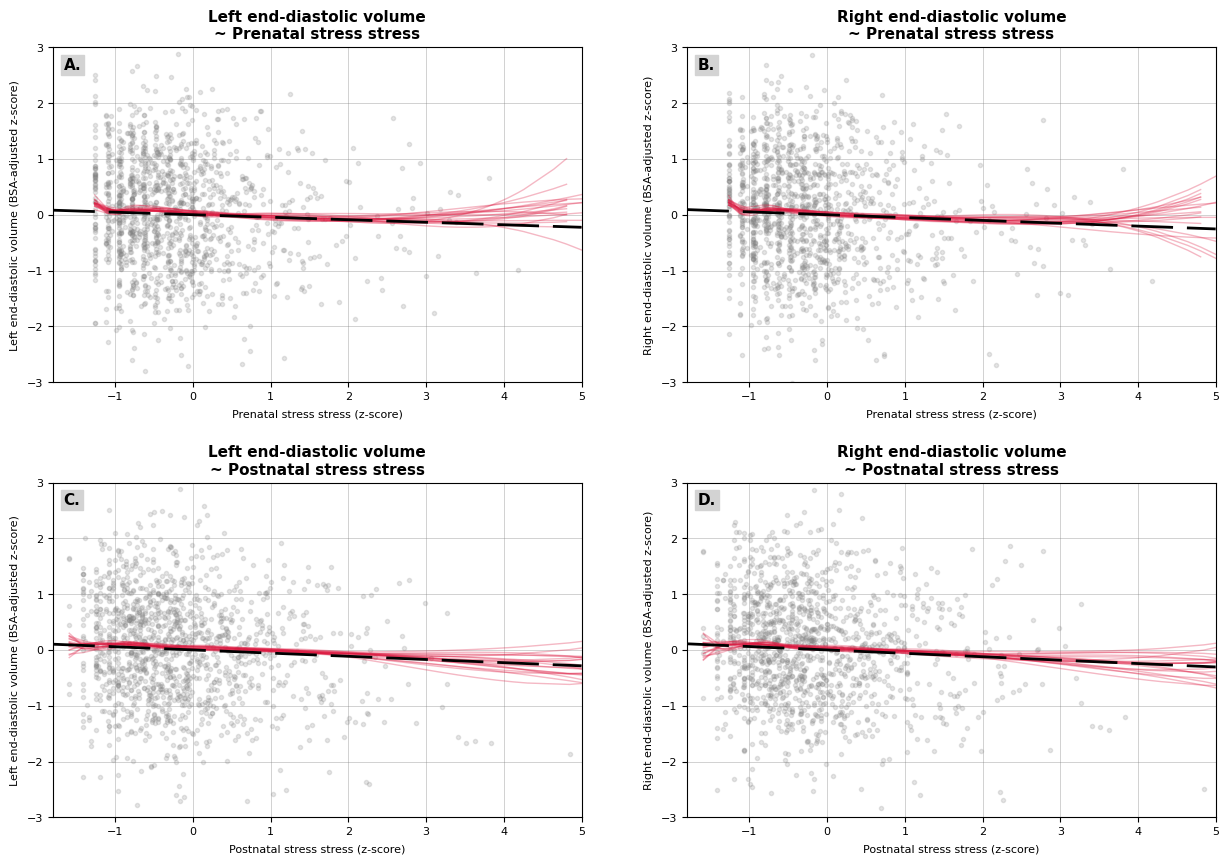

In [65]:
from scipy import interpolate

respath = '/Users/Serena/Desktop/cardiacMRI/Data/df_by_imp/'
dat = pd.read_csv(respath+'Data_imp0.csv')
dat.shape

# Fit the spline
def splineit(imp, exp, out, ax, knot_number = 4, color='#41ab5d'):
    # read in imputed dataset and sort by exposure values
    d = pd.read_csv(f'{respath}/Data_imp{str(imp)}.csv').sort_values(by=exp+'_z')
    x = d[exp+'_z']
    y = d[out+'_bsaz']
    # determine where are the knots 
    x_new = np.linspace(0, 1, knot_number+2)[1:-1] # knot_number equally spaced values from 0-1
    q_knots = np.quantile(x, x_new) # use them to define quantiles of x
    # fit the spline 
    t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
    yfit = interpolate.BSpline(t,c,k)(x) 
    # plot the spline line 
    ax.plot(x, yfit, color=color, lw=1, alpha=0.3)

def predY(exp, out, ax, cutoff=3, col='crimson', col_outcome=False, rep_yaxis=True, ms=3, f1=11, f2=8, title=''):
    # in the non-imputed set:
    x = dat[f'{exp}_z']
    y = dat[f'{out}_bsaz']
    
    # extract linear regression estimate from results table 
    md = show_results(f'{out}_bsaz_M0', with_intercept=True)
    slope = md.loc[md.term==f'{exp}_z'].iloc[0]['estimate']
    inter = md.loc[(md.model.str.contains(f'{exp}_z -')) & (md.term=='(Intercept)')]['estimate']
    
    # scatter plot 
    ax.plot(x, y, 'o', color='grey', ms=ms, alpha=0.2)
    
    # nonlinear relation 
    for imp in range(1,20):
        splineit(imp, exp=exp, out=out, ax=ax, color=col)
    
    # regression line
    ax.axline(xy1=(0, 0), slope=slope, ls='--', lw=2, color='k', dashes=(15, 5)) # (0,inter)
    
    # set axis limits
    ax.set_ylim(-cutoff,cutoff)
    ax.set_xlim(-1.8,5)
    # add grid and 2.5 SD cuoffs 
    ax.grid(color = 'grey', ls = '-', lw= 0.5, alpha=0.5)
    #ax.axvspan(-7,-2.5,alpha=0.1, color='grey')
    #ax.axvspan(2.5, 7, alpha=0.1, color='grey')
    # adjust axis ticks 
    ax.tick_params(axis='both', which='major', labelsize=f2)
    
    exp_name = exp.capitalize().replace('_', ' ')
    ax.set_xlabel(exp_name+' stress (z-score)', fontsize=f2, labelpad=5)
    
    outc_name = 'Left' if out[0]=='L' else 'Right' # if outc not in ['MFA','MMD'] else outc[1:]
    ax.set_ylabel(f'{outc_name} end-diastolic volume (BSA-adjusted z-score)', fontsize=f2, labelpad=5)
        
    ax.set_title(f'{outc_name} end-diastolic volume\n~ {exp_name} stress', fontsize=f1, fontweight='bold', pad=6)
    
# ==============================================================================================    
f, axs = plt.subplots(2, 2, figsize=(cm, 2/3*cm))

plt.rcParams["font.family"] = "sans-serif"

f.subplots_adjust(hspace=0.3, wspace=0.2)

predY('prenatal_stress','LV_end_diastolic_volume', axs[0,0], title='Preantal stress ~ Ldiast')
predY('postnatal_stress','LV_end_diastolic_volume', axs[1,0], title='Postnatal stress ~ Ldiast')

predY('prenatal_stress','RV_end_diastolic_volume', axs[0,1], title='\nPreantal stress ~ Rdiast')
predY('postnatal_stress','RV_end_diastolic_volume', axs[1,1], title='\nPostnatal stress ~ Rdiast')

for n, aa in enumerate(axs.flat):
    aa.text(0.02, 0.97, string.ascii_uppercase[n]+'.', va='top', 
            transform=aa.transAxes, size=11, weight='bold',
            bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', pad=2))

f.savefig('/Users/Serena/Desktop/cardiacMRI/nonlin_res.png', bbox_inches="tight", dpi=400)